In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # I love this package!
sns.set_style('white')

import torch

### Loss Trend Check

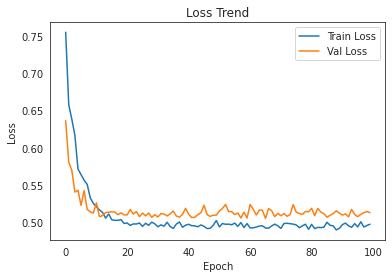

In [3]:
# load check point
model_path = 'checkpoint.pth.tar'
checkpoint = torch.load(model_path)
loss_history_train = checkpoint['loss_history_train']
loss_history_val = checkpoint['loss_history_val']
#loss_train = [np.mean(l) for l in loss_history_train]
loss_train = [float(torch.mean(torch.stack(l))) for l in loss_history_train]
#loss_val = [np.mean(l) for l in loss_history_val]
loss_val = [float(torch.mean(torch.stack(l))) for l in loss_history_val]

plt.plot(loss_train, label = 'Train Loss')
plt.plot(loss_val, label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()

In [36]:
#float(loss_history_train[1][0])
#torch.mean(torch.stack(loss_history_train[0]))

loss_val

[0.6362558603286743,
 0.5807830691337585,
 0.569734513759613,
 0.5407999753952026,
 0.5431944727897644,
 0.5230434536933899,
 0.5427296757698059,
 0.5175750255584717,
 0.514234185218811,
 0.5127322673797607,
 0.5263868570327759,
 0.5078656077384949,
 0.5093081593513489,
 0.5133828520774841,
 0.513835608959198,
 0.5143612623214722,
 0.5140327215194702,
 0.5104641914367676,
 0.5129261016845703,
 0.5102764964103699,
 0.5101448893547058,
 0.5176069736480713,
 0.5113389492034912,
 0.514665961265564,
 0.5079241991043091,
 0.5125938653945923,
 0.5090309977531433,
 0.5127591490745544,
 0.5069738626480103,
 0.5104843974113464,
 0.5074579119682312,
 0.5119321942329407,
 0.5113310813903809,
 0.5088596940040588,
 0.5116345286369324,
 0.5154499411582947,
 0.5087157487869263,
 0.5073163509368896,
 0.510775625705719,
 0.5190760493278503,
 0.5110756158828735,
 0.5067635178565979,
 0.507018506526947,
 0.5106114149093628,
 0.5131067633628845,
 0.5231632590293884,
 0.510624349117279,
 0.508203387260437,


### Model performance

In [10]:
model_path = 'model_best.pth.tar'
# calculate outputs for the test data with our best model
output_csv_path = 'pred.csv'
command = ('python pred.py '
           '--img_dir /UCLA-protest/img/test/ '
           '--output_csvpath {csv_path} '
           '--model {model} --batch_size 4 --cuda'
           .format(csv_path = output_csv_path, model = model_path))

            
#!{command}

# load prediction
df_pred = pd.read_csv(output_csv_path)
df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

# load target
test_label_path = '/UCLA-protest/annot_test.txt'
df_target = pd.read_csv(test_label_path, delimiter= '\t')

In [6]:
#python pred.py --img_dir /UCLA-protest/img/test/ --output_csvpath pred.csv --model model_best.pth.tar --batch_size 4 --cuda
torch.load('model_best.pth.tar')

{'epoch': 66,
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.6517e-02,  1.8187e-02, -6.5171e-03,  ..., -3.6286e-02,
                          -4.1493e-02, -7.0492e-02],
                         [ 2.6069e-03,  4.4363e-03,  1.7714e-02,  ...,  5.0937e-03,
                          -2.2447e-02, -3.9611e-02],
                         [ 2.1309e-02,  2.2786e-02,  1.8734e-02,  ...,  1.0302e-01,
                           5.9252e-02,  5.0415e-02],
                         ...,
                         [ 3.0231e-03,  2.7849e-02, -9.4797e-03,  ..., -1.2531e-01,
                          -7.7388e-02,  5.5800e-03],
                         [ 1.1939e-02,  4.8081e-02,  5.9263e-02,  ...,  2.4268e-02,
                          -3.2822e-02, -1.6059e-02],
                         [-7.2951e-02, -3.2099e-02, -1.9288e-02,  ...,  3.3949e-02,
                           2.2295e-02,  1.7248e-03]],
               
                        [[-1.4985e-02,  1.3165e-02,  3.0556e-02,  ...,  

#### Binary Variables

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

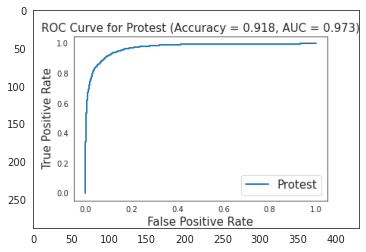

In [15]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('files/protest.png', 'r')
imshow(np.asarray(pil_im))

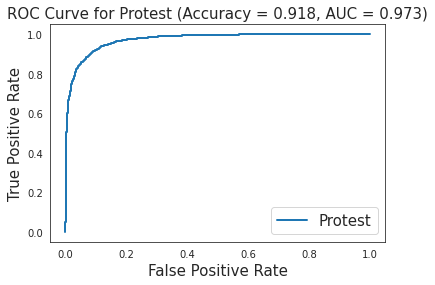

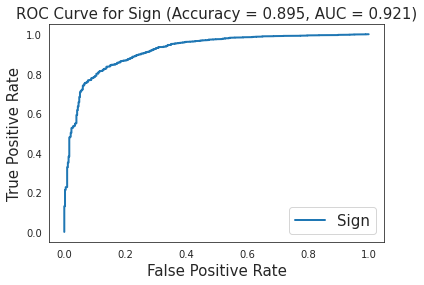

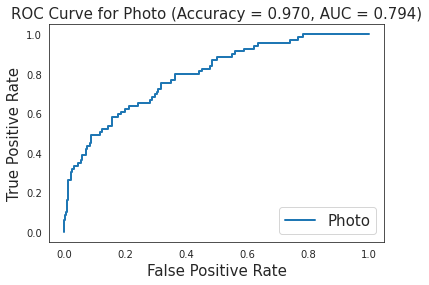

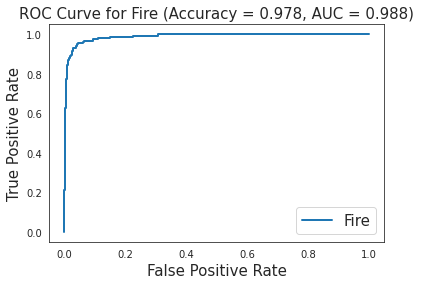

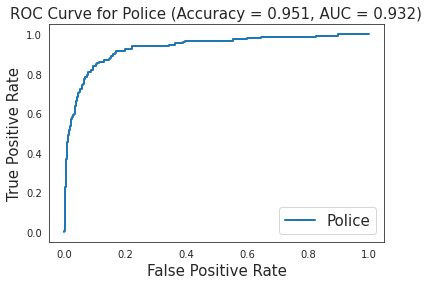

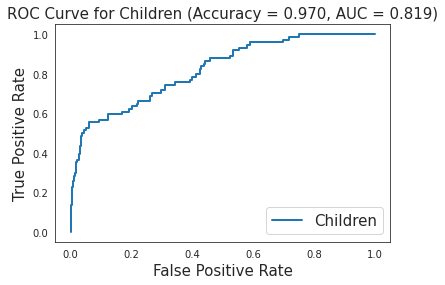

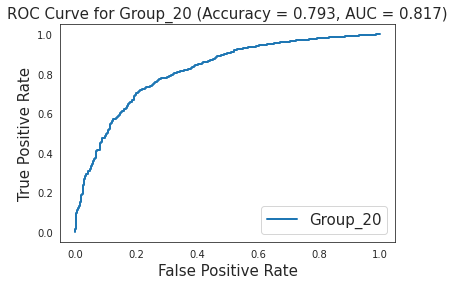

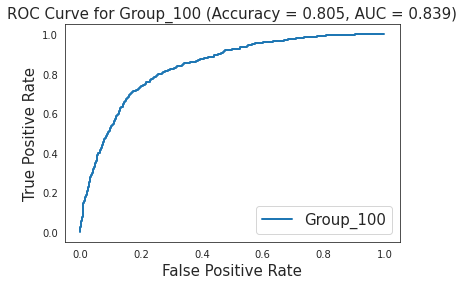

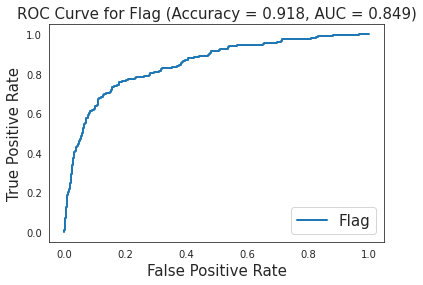

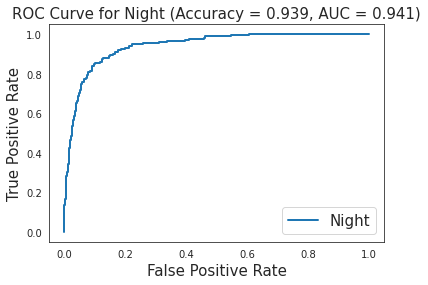

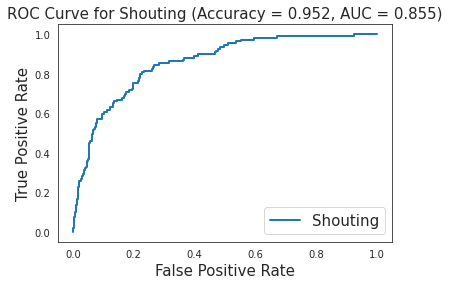

In [16]:
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
fig.savefig(os.path.join('files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    fig.savefig(os.path.join('files', attr+'.png'))

#### Violence

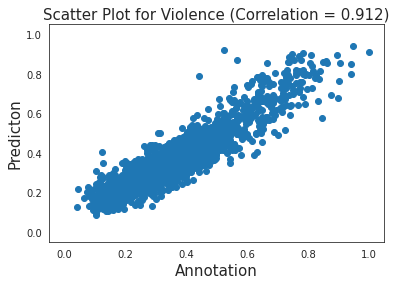

In [14]:
import scipy.stats as stats
attr = 'violence'
pred = df_pred[df_target['protest'] == 1][attr].tolist()
target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
fig, ax = plt.subplots()
plt.scatter(target, pred, label = attr.title())
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(target, pred)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = attr.title(), corr= corr)), fontsize = 15)
plt.show()
fig.savefig(os.path.join('files', attr+'.png'))